The GEOS library is used within the code to carry out operations on polygons and some other operations

In [1]:
import timeit 

import numpy as np
import matplotlib.pyplot as plt
import teqpflsh

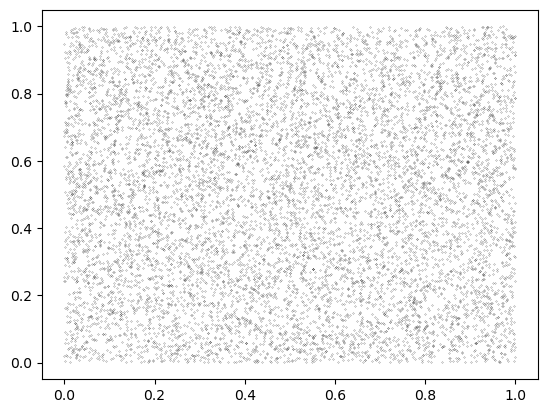

In [2]:
# A box, randomly sampled
X = np.array([0,1,1,0,0.0])
Y = np.array([0,0,1,1,0.0])
N = 10000
reg = teqpflsh.QuadRegion2D(x=X,y=Y)
x, y = np.zeros(N,), np.zeros(N)
reg.sample_random(len(x), x, y)
plt.plot(x, y, 'k.', ms=0.3);
del reg

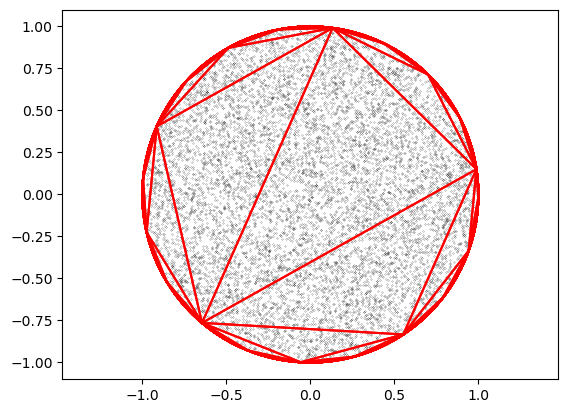

In [3]:
# A circle, randomly sampled by first triangulation and then sampling

t = np.linspace(0, 2*np.pi, 10000)
X = np.cos(t)
Y = np.sin(t)

N = 10000
reg = teqpflsh.QuadRegion2D(x=X,y=Y)
x, y = np.zeros(N,), np.zeros(N)
reg.sample_random(len(x), x, y)
plt.plot(x, y, 'k.', ms=0.3)
plt.axis('equal')

# And here are the triangles
tri = reg.do_fast_triangulation()
for i in range(tri.getNumGeometries()):
    coords = tri.getGeometryN(i).getCoordinates()
    # get the vertices of the triangle
    Ncoords = coords.getSize()
    x = [coords.getX(_) for _ in range(Ncoords)]
    y = [coords.getY(_) for _ in range(Ncoords)]
    plt.plot(x, y, 'r')
del reg

1 503.5958020016551
2 47.72125044837594
3 4.879750078544021
4 0.6118291988968849
5 0.206902080681175
6 0.17682820791378617
7 0.17567517920397221


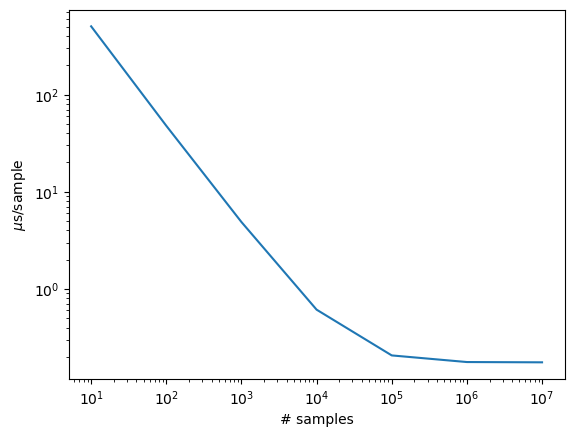

In [4]:
# For few samples, you are dominated by Delaunay triangulation cost
# and then for more samples, the cost is dominated by the sampling
# itself. The more refined the polygon, the slower the triangulation

reg = teqpflsh.QuadRegion2D(x=X,y=Y)
exponents, times = [],[]
for exponent in range(1, 8):
    N = 10**exponent    
    x, y = np.zeros(N,), np.zeros(N)
    tic = timeit.default_timer()
    reg.sample_random(len(x), x, y)
    toc = timeit.default_timer()
    times.append((toc-tic)*1e6/N)
    print(exponent, times[-1])
    exponents.append(exponent)

plt.plot(10**np.array(exponents), times)
plt.xscale('log')
plt.yscale('log')
plt.gca().set(xlabel='# samples', ylabel='$\mu$s/sample')
plt.show()
del reg

1 21.625019144266844
1 12.625008821487427
1 6.208021659404039
1 5.58304600417614
1 4.583969712257385
1 7.0829992182552814
1 6.00004568696022
2 1.8020073184743524
2 1.333246473222971
2 1.156251528300345
2 1.208492903970182
2 1.0937510523945093
2 1.156251528300345
2 1.0832591215148568
3 130.3935552843743
3 101.73610644415021
3 91.07411218186219
3 89.21288988656468
4 41.783874621614814
4 49.927060899790376
4 45.776061597280204
5 31.495001167058945
5 32.8366388566792
5 28.920001350343227
6 24.027778029752273
6 22.733805558851195
7 16.271244801048724
7 18.521245302898542
8 16.7291718753404
8 16.650390534778126
9 13.205765338361632
9 13.390950496411985
10 10.759169817902148
11 9.010669540552316
12 7.560764061054215
13 5.575935025671883
13 5.292899413420075
14 4.635627526428778
15 4.123888858076598
17 3.638982637479231
18 2.8258734267710905
19 2.874653861236209
20 2.487499878043309
22 1.779355398333085
23 1.607119129523494
25 1.3820655643939972
27 1.2209067256566757
29 1.1153887640618398
31 0

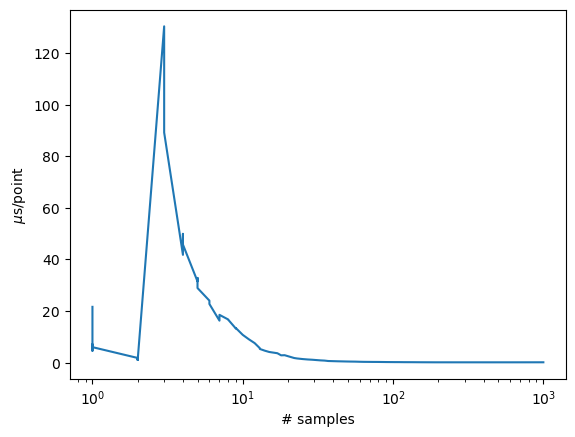

In [8]:
# Gridded sampling is relatively slow because the point-in-polygon problem
# is itself pretty slow, certainly much slower than random point in polygon generation

# The prepared polygon method is used in GEOS library which makes
# the point-in-polygon check *several orders of magnitude* faster
# class: `geos::geom::prep::PreparedPolygon`
reg = teqpflsh.QuadRegion2D(x=X,y=Y)

Ns, times = [],[]
for N in np.logsinspace(0.1, 3, 101):
    N = int(10**exponent)
    bufx, bufy = np.zeros(N*N), np.zeros(N*N)
    gridx = np.linspace(-1,1,N)
    gridy = np.linspace(-1,1,N)
    
    tic = timeit.default_timer()
    reg.sample_gridded(gridx, gridy, bufx, bufy)
    toc = timeit.default_timer()

    times.append((toc-tic)/N**2*1e6)
    print(N, times[-1])
    Ns.append(N)

plt.plot(Ns, times)
plt.xscale('log')
plt.gca().set(xlabel='# samples', ylabel='$\mu$s/point')
plt.show()

0.1 89.45801528170705
0.29000000000000004 41.87499871477485
0.48 43.55099776552783
0.67 60.6588764640037
0.86 45.97959151415497
1.05 39.84263638219188
1.2400000000000002 31.538062147267652
1.4300000000000002 38.147497041834264
1.62 24.742613325492744
1.81 19.051696781957617
2.0 18.955079198349267


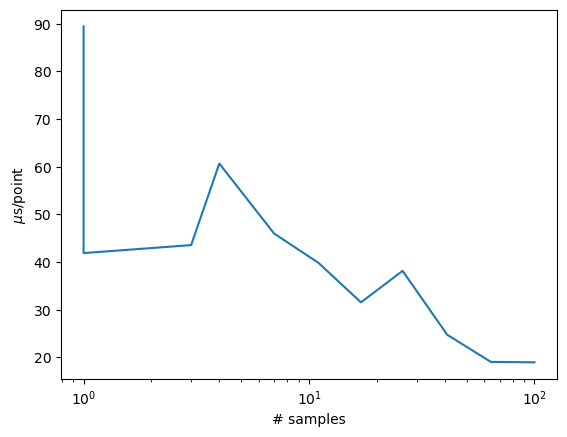

In [4]:
# Gridded sampling is relatively slow because the point-in-polygon problem
# is itself pretty slow, certainly much slower than random point in polygon generation
reg = teqpflsh.QuadRegion2D(x=X,y=Y)

Ns, times = [],[]
for exponent in np.linspace(0.1, 2, 11):
    N = int(10**exponent)
    gridx = np.linspace(-0.1,0.1,N)
    gridy = np.linspace(-0.1,0.1,N)
    bufx, bufy = np.zeros(N*N+2), np.zeros(N*N+2)
    
    tic = timeit.default_timer()
    reg.sample_gridded_w_tree(gridx, gridy, bufx, bufy)
    toc = timeit.default_timer()

    times.append((toc-tic)/N**2*1e6)
    print(exponent, times[-1])
    Ns.append(N)

plt.plot(Ns, times)
plt.xscale('log')
plt.gca().set(xlabel='# samples', ylabel='$\mu$s/point')
plt.show()

60


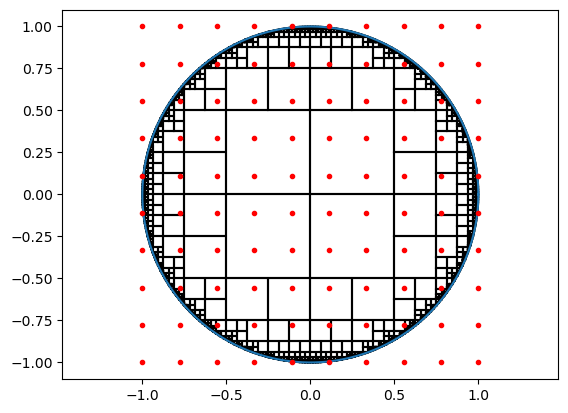

In [5]:
import timeit 

import numpy as np
import matplotlib.pyplot as plt
import teqpflsh

t = np.linspace(0, 2*np.pi, 10000)
X = np.cos(t)
Y = np.sin(t)

reg = teqpflsh.QuadRegion2D(x=X,y=Y)
exponent = 1
N = int(10**exponent)
gridx = np.linspace(-1,1,N)
gridy = np.linspace(-1,1,N)
bufx, bufy = np.zeros(N*N+2), np.zeros(N*N+2)
GX, GY = np.meshgrid(gridx, gridy)

tree = reg.get_quadtree_ro()
reg.do_splits(7)
Ninside = 0
for i in range(GX.shape[0]):
    for j in range(GX.shape[1]):
        node = tree.tree.getNode(GX[i,j], GY[i,j], False)
        Ninside += (tree.get_status(node) == teqpflsh.PQTStatus.inside)
#         print(tree.get_status(node))
print(Ninside)
        
for leaf in tree.get_leaves():
    xy = tree.get_polygon_xy(leaf)
    if xy:
        plt.plot(*xy, color='k')
        
plt.plot(X,Y)
plt.plot(GX, GY, 'r.');
plt.axis('equal');

In [6]:
%timeit tree.tree.getNode(0.0001, 0.0001, True)

152 ns ± 0.784 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


1000.0 10000


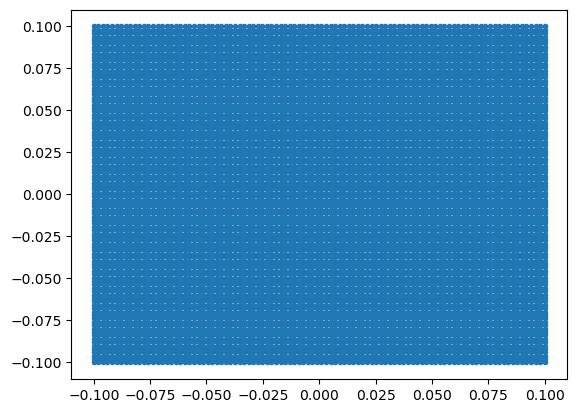

In [7]:
reg = teqpflsh.QuadRegion2D(x=X,y=Y)

exponent = 2
N = int(10**exponent)
gridx = np.linspace(-0.1,0.1,N)
gridy = np.linspace(-0.1,0.1,N)
bufx, bufy = np.zeros(N*N+2), np.zeros(N*N+2)

Np = reg.sample_gridded_w_tree(gridx, gridy, bufx, bufy)
plt.plot(bufx[0:Np], bufy[0:Np], '.')
print(N**2*0.1, Np)